In [1]:
%pylab inline
import tensorflow as tf
import sys
sys.path.insert(0, '../python')

Populating the interactive namespace from numpy and matplotlib


# Step I: Reading data

In [2]:
from DeepDeconv.utils.batch_utils import dynamic_batches

In [3]:
#Input the directory containing the fits file
data_directory = '/data/DeepDeconv/data/vsc_euclidpsfs/reshuffle/'
write_path="/data/DeepDeconv/data/vsc_euclidpsfs/reshuffle/"

#Retrieves the list of all the files
import glob

gal_files = glob.glob(data_directory+'image-*-multihdu.fits')
gal_files.sort()

SNR = [20,100]#Range of SNR simulated
noiseless_img_hdu = 0
psf_hdu = 1
targets_hdu = 2
deconv_mode = 'TIKHONOV'

In [4]:
gen = dynamic_batches(gal_files[2:] , batch_size=32, noise_std=None, SNR=SNR, 
                noiseless_img_hdu=noiseless_img_hdu, targets_hdu=targets_hdu,
                psf_hdu=psf_hdu, image_dim=96, image_per_row=100,
                deconv_mode=deconv_mode)

In [5]:
a = next(gen)

In [6]:
a[0].shape, a[1].shape, a[2].shape

((32, 96, 96, 1), (32, 96, 96, 1), (32,))

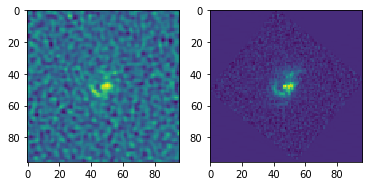

In [8]:
subplot(121)
imshow(a[0][3,:,:,0])
subplot(122)
imshow(a[1][3,:,:,0])

## Step II: Define a network

In [9]:
# Disclaimer.... this is a very stupod networl
inputs = tf.keras.Input(shape=[96, 96, 1])

net = tf.keras.layers.Conv2D(32, 3, padding='same')(inputs)
net = tf.keras.layers.Activation('relu')(net)
net = tf.keras.layers.Conv2D(16, 3, padding='same')(net)

output = tf.keras.layers.Conv2D(1, 3, padding='same')(net)

InternalError: cudaGetDevice() failed. Status: CUDA driver version is insufficient for CUDA runtime version

In [ ]:
# Compile the model
model = tf.keras.Model(input=inputs, outputs=output)
model.compile(optimizer = Adam(lr=1e-3), loss = 'mse')

## Step III: Training

In [ ]:
# Train the model
history = model.fit_generator(gen, 
                              samples_per_epoch=10000,
                              epochs=20,)

In [ ]:
# have a look at history
history

## Step IV: Applying the model

In [ ]:
# The model can be applied like so:
res = model(a[0])
# This should return the solution of the deconvolution prblm